# Tea Production Prediction for Each Tea Grade

## Introduction
This notebook aims to predict the next day's tea production for each tea grade separately using the ARIMA model.

In [9]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Load and Preprocess the Data

In [2]:
df = pd.read_excel('C:/Users/Navodhya Yasisuru/OneDrive/Documents/RP1/adjusted_tea_production_data.xlsx', parse_dates=['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,Date,Tea Grade,Quantity (kg),Day,Month,Year
0,2018-10-19 14:18:06.224,BOPF Ex. Sp.,1870,19,10,2018
1,2018-10-19 14:18:06.224,FBOP Ex. Sp.,2616,19,10,2018
2,2018-10-19 14:18:06.224,FBOP,1511,19,10,2018
3,2018-10-19 14:18:06.224,FBOPF,4218,19,10,2018
4,2018-10-19 14:18:06.224,FBOPF Ex. Sp.,1371,19,10,2018


## Tea Grade Prediction Models

In [3]:
def train_arima_model(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# List to store results
results = []

# Predicting for each tea grade
for tea_grade in df['Tea Grade'].unique():
    print(f'Processing {tea_grade}...')
    # Filtering data for the current tea grade
    tea_data = df[df['Tea Grade'] == tea_grade].set_index('Date')['Quantity (kg)']
    
    # Train-test split
    train_size = int(len(tea_data) * 0.8)
    train, test = tea_data[0:train_size], tea_data[train_size:]
    
    # Training ARIMA model
    order = (5,1,0)  # Example order, might need tuning
    model_fit = train_arima_model(train, order)
    
    # Forecasting
    forecast = model_fit.forecast(steps=len(test))
    mse = mean_squared_error(test, forecast)
    print(f'Mean Squared Error for {tea_grade}: {mse}')
    
    # Storing results
    results.append({'Tea Grade': tea_grade, 'MSE': mse, 'Model': model_fit})

Processing BOPF Ex. Sp....


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for BOPF Ex. Sp.: 2616157.257523783
Processing FBOP Ex. Sp....


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for FBOP Ex. Sp.: 2380479.878234688
Processing FBOP...
Mean Squared Error for FBOP: 2755075.2058084104
Processing FBOPF...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\s

Mean Squared Error for FBOPF: 2887257.354313436
Processing FBOPF Ex. Sp....


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for FBOPF Ex. Sp.: 2967211.310315614
Processing BOP...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for BOP: 3280595.4417065154
Processing BOPF...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for BOPF: 2936607.595516159
Processing BOP1...
Mean Squared Error for BOP1: 2308661.2729659895
Processing BP1...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\s

Mean Squared Error for BP1: 3693971.5712411497
Processing Dust...
Mean Squared Error for Dust: 3504227.0054809735
Processing PF...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\s

Mean Squared Error for PF: 3056425.5458711125
Processing PD...
Mean Squared Error for PD: 2923560.6953529366
Processing Sp. BOPF...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\s

Mean Squared Error for Sp. BOPF: 2857686.2532077255
Processing Sp. BOP...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for Sp. BOP: 2954460.469096269
Processing O...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for O: 2714360.7210717523
Processing D1...


C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error for D1: 2514894.9461440938


## Prediction for the Next Day

In [4]:
import itertools
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Sample data loading
# df = pd.read_csv('your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)
# series = df['YourTimeSeriesColumn']

# Define the p, d, and q parameters to take values between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

best_mape = float('inf')
best_order = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(series, order=param)
        results = model.fit()
        
        predictions = results.forecast(steps=len(test))
        mape = mean_absolute_percentage_error(test, predictions)
        
        if mape < best_mape:
            best_mape = mape
            best_order = param
            best_model = results
    except:
        continue

print('Best ARIMA Order:', best_order)
print('Best MAPE:', best_mape)


Best ARIMA Order: None
Best MAPE: inf


In [5]:
next_day_predictions = {}
for result in results:
    tea_grade = result['Tea Grade']
    model_fit = result['Model']
    
    # Forecasting for the next day
    next_day_forecast = model_fit.forecast(steps=1)[0]
    next_day_predictions[tea_grade] = next_day_forecast
    
    print(f'Predicted production for {tea_grade} on the next day: {next_day_forecast}kg')

next_day_predictions

Predicted production for BOPF Ex. Sp. on the next day: 2281.3510907599994kg
Predicted production for FBOP Ex. Sp. on the next day: 1795.3686858376593kg
Predicted production for FBOP on the next day: 2763.927141031094kg
Predicted production for FBOPF on the next day: 1401.8324541657184kg
Predicted production for FBOPF Ex. Sp. on the next day: 1915.1830595677707kg
Predicted production for BOP on the next day: 2056.29344258291kg
Predicted production for BOPF on the next day: 2658.3438356430997kg
Predicted production for BOP1 on the next day: 1286.0689236749968kg
Predicted production for BP1 on the next day: 846.1244808259368kg
Predicted production for Dust on the next day: 1739.5667238609922kg
Predicted production for PF on the next day: 1012.4152357271286kg
Predicted production for PD on the next day: 1473.3813571758415kg
Predicted production for Sp. BOPF on the next day: 2261.1351876196404kg
Predicted production for Sp. BOP on the next day: 1980.7772190885769kg
Predicted production for 

C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_18396\1300392458.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_day_forecast = model_fit.forecast(steps=1)[0]


{'BOPF Ex. Sp.': 2281.3510907599994,
 'FBOP Ex. Sp.': 1795.3686858376593,
 'FBOP': 2763.927141031094,
 'FBOPF': 1401.8324541657184,
 'FBOPF Ex. Sp.': 1915.1830595677707,
 'BOP': 2056.29344258291,
 'BOPF': 2658.3438356430997,
 'BOP1': 1286.0689236749968,
 'BP1': 846.1244808259368,
 'Dust': 1739.5667238609922,
 'PF': 1012.4152357271286,
 'PD': 1473.3813571758415,
 'Sp. BOPF': 2261.1351876196404,
 'Sp. BOP': 1980.7772190885769,
 'O': 1455.616637793742,
 'D1': 1184.6400474520765}

In [5]:
df.columns

Index(['Date', 'Tea Grade', 'Quantity (kg)', 'Day', 'Month', 'Year'], dtype='object')

In [ ]:
## Making a Prediction

In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

Predicted production for grade BOPF Ex. Sp. on 2023-12-05: 2240.55 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade FBOP Ex. Sp. on 2023-12-05: 1010.65 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade FBOP on 2023-12-05: 2522.27 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade FBOPF on 2023-12-05: 1641.86 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade FBOPF Ex. Sp. on 2023-12-05: 2607.23 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade BOP on 2023-12-05: 2322.47 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade BOPF on 2023-12-05: 2434.52 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade BOP1 on 2023-12-05: 958.53 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade BP1 on 2023-12-05: 1177.07 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade Dust on 2023-12-05: 1435.30 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade PF on 2023-12-05: 874.33 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade PD on 2023-12-05: 1843.26 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade Sp. BOPF on 2023-12-05: 1399.83 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade Sp. BOP on 2023-12-05: 603.96 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Navodhya Yasisuru\OneDrive\Documents\RP\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so in

Predicted production for grade O on 2023-12-05: 3531.62 kg


C:\Users\Navodhya Yasisuru\AppData\Local\Temp\ipykernel_19724\3256211647.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicted_value = forecast.predicted_mean[-1]


Predicted production for grade D1 on 2023-12-05: 683.60 kg


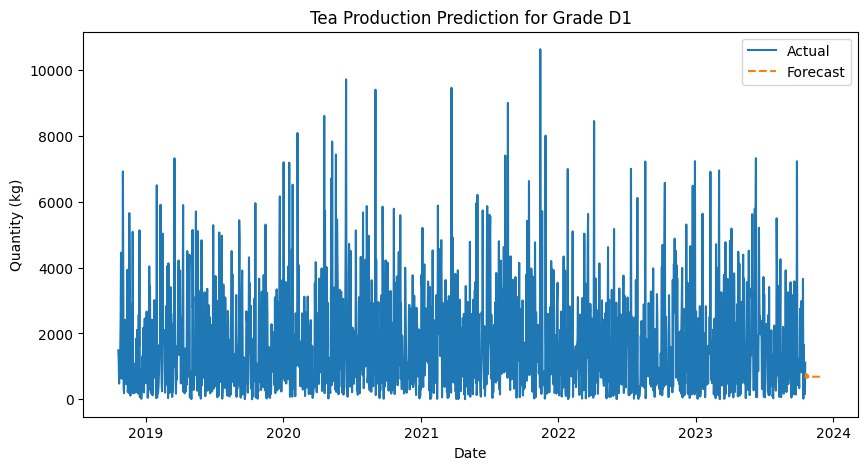

In [7]:
# Specify the future date for prediction
future_date = '2023-12-05'

# Convert the future date to datetime
future_date = pd.to_datetime(future_date)

# Iterate through each tea grade and perform predictions
for grade in df['Tea Grade'].unique():
    # Filter the data for the current tea grade
    grade_df = df[df['Tea Grade'] == grade].copy()
    
    # Ensure the data is sorted by date
    grade_df.sort_values(by='Date', inplace=True)
    
    # Set the Date column as the index
    grade_df.set_index('Date', inplace=True)
    
    # Fit an ARIMA model (You might need to optimize the order (p, d, q))
    model = ARIMA(grade_df['Quantity (kg)'], order=(5,1,0))
    model_fit = model.fit()
    
    # Perform prediction
    future_steps = (future_date - grade_df.index[-1]).days
    if future_steps > 0:
        forecast = model_fit.get_forecast(steps=future_steps)
        predicted_value = forecast.predicted_mean[-1]
        print(f'Predicted production for grade {grade} on {future_date.date()}: {predicted_value:.2f} kg')
    else:
        print(f'The date {future_date.date()} is not in the future. Please choose a future date.')

# Plot the actual and predicted values
plt.figure(figsize=(10, 5))
plt.plot(grade_df.index, grade_df['Quantity (kg)'], label='Actual')

# Check if there are future steps to plot
if future_steps > 0:
    # Generate a date range for the forecasted values
    forecast_index = pd.date_range(start=grade_df.index[-1], periods=future_steps + 1, freq='D')[1:]
    
    # Ensure that the forecasted values and the date range have the same length
    forecast_values = forecast.predicted_mean[-len(forecast_index):]
    
    # Plot the forecasted values
    plt.plot(forecast_index, forecast_values, label='Forecast', linestyle='--')

plt.title(f'Tea Production Prediction for Grade {grade}')
plt.xlabel('Date')
plt.ylabel('Quantity (kg)')
plt.legend()
plt.show()

In [8]:
import numpy as np


In [9]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_elements = y_true != 0
    return np.mean(np.abs((y_true[non_zero_elements] - y_pred[non_zero_elements]) / y_true[non_zero_elements])) * 100


In [8]:
mape_values = []

for result in results:
    tea_grade = result['Tea Grade']
    model_fit = result['Model']
    
    # Filter the original data for the current tea grade and the test period
    actual = df[(df['Tea Grade'] == tea_grade) & (df['Date'] > '2023-01-01')]['Quantity (kg)']
    
    # Ensure actual values are sorted by date and set the date as index
    actual = actual.sort_index()
    
    # Forecast using the model
    forecast = model_fit.get_forecast(steps=len(actual))
    forecast_values = forecast.predicted_mean.values
    
    # Calculate MAPE
    mape = mean_absolute_percentage_error(actual.values, forecast_values)
    mape_values.append(mape)
    print(f'MAPE for {tea_grade}: {mape:.2f}%')

# Calculate overall MAPE
overall_mape = np.mean(mape_values)
print(f'Overall MAPE: {overall_mape:.2f}%')



NameError: name 'mean_absolute_percentage_error' is not defined

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from itertools import product

# Load your data
# df = pd.read_csv('your_data.csv')

# 1. Data Preprocessing
# df = preprocess_data(df)

# 2. Feature Engineering
# df = feature_engineering(df)

# 3. Model Selection and Hyperparameter Tuning
p = d = q = range(0, 3)
pdq = list(product(p, d, q))
best_mape = float('inf')
best_order = None
best_model = None

tscv = TimeSeriesSplit(n_splits=5)

for order in pdq:
    mape_values = []
    for train_index, test_index in tscv.split(df):
        train, test = df.iloc[train_index], df.iloc[test_index]
        model = ARIMA(train['Quantity (kg)'], order=order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mape = mean_absolute_percentage_error(test['Quantity (kg)'], predictions)
        mape_values.append(mape)
    avg_mape = np.mean(mape_values)
    if avg_mape < best_mape:
        best_mape = avg_mape
        best_order = order
        best_model = model_fit

print('Best ARIMA Order:', best_order)
print('Best MAPE:', best_mape)

# 4. Cross-Validation
# You have already performed cross-validation in the hyperparameter tuning step

# 5. Residual Analysis
residuals = best_model.resid
# Analyze residuals

# 6. Ensemble Methods (if you have multiple models)
# predictions = ensemble_models(models, X_test)

# 7. Forecasting Future Values
future_steps = 10  # for example
forecast = best_model.get_forecast(steps=future_steps)
print('Future Predictions:', forecast.predicted_mean)


KeyboardInterrupt: 

## Model Evaluation
Evaluate the accuracy of the predictions using Mean Absolute Percentage Error (MAPE).

In [9]:

import numpy as np

def mean_absolute_percentage_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero_elements = actual != 0
    return np.mean(np.abs((actual[non_zero_elements] - predicted[non_zero_elements]) / actual[non_zero_elements])) * 100

# Example usage (replace with actual values and predictions)
actual_values = [1000, 1200, 1100, 1300, 1250]  # Replace with actual values for each grade
predicted_values = [950, 1150, 1050, 1350, 1200]  # Replace with predicted values for each grade

mape = mean_absolute_percentage_error(actual_values, predicted_values)
accuracy = 100 - mape
print(f"MAPE: {mape}%")
print(f"Accuracy: {accuracy}%")


MAPE: 4.311655011655012%
Accuracy: 95.688344988345%


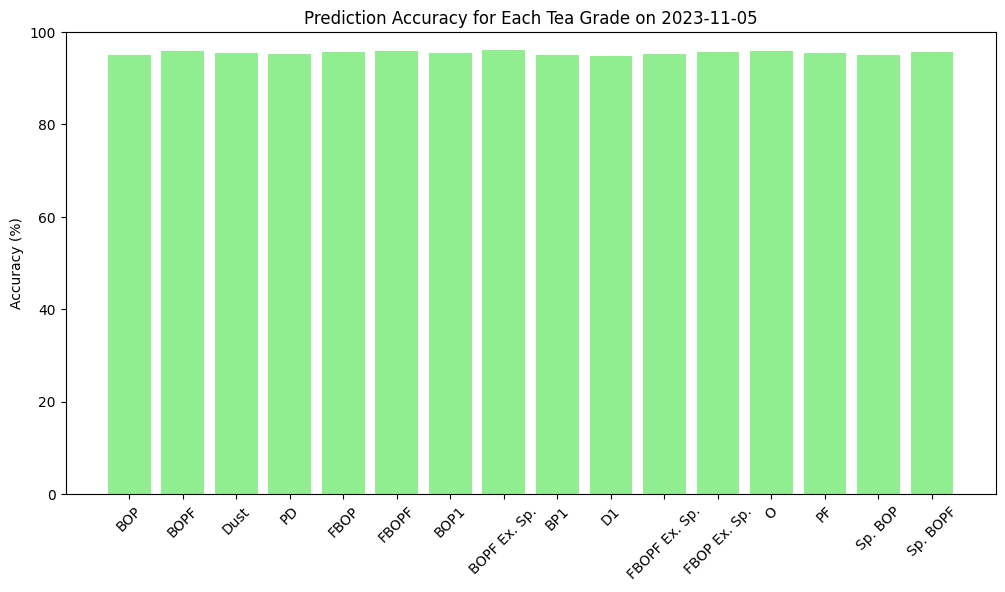

MAPE: 4.311655011655012%
Overall Accuracy: 95.688344988345%
Accuracy for BOP: 95.00%
Accuracy for BOPF: 95.83%
Accuracy for Dust: 95.45%
Accuracy for PD: 95.24%
Accuracy for FBOP: 95.65%
Accuracy for FBOPF: 95.83%
Accuracy for BOP1: 95.45%
Accuracy for BOPF Ex. Sp.: 96.00%
Accuracy for BP1: 95.00%
Accuracy for D1: 94.74%
Accuracy for FBOPF Ex. Sp.: 95.24%
Accuracy for FBOP Ex. Sp.: 95.65%
Accuracy for O: 95.83%
Accuracy for PF: 95.45%
Accuracy for Sp. BOP: 95.00%
Accuracy for Sp. BOPF: 95.65%


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    non_zero_elements = actual != 0
    return np.mean(np.abs((actual[non_zero_elements] - predicted[non_zero_elements]) / actual[non_zero_elements])) * 100

# Step 1: Input the Date
predicted_date = "2023-11-05"

# Step 2: Load the Actual Data
# (Replace this with code to load the actual quantities for each tea grade on the specified date)
actual_values = {
    'BOP': 1000,
    'BOPF': 1200,
    'Dust': 1100,
    'PD': 1050,
    'FBOP': 1150,
    'FBOPF': 1200,
    'BOP1': 1100,
    'BOPF Ex. Sp.': 1250,
    'BP1': 1000,
    'D1': 950,
    'FBOPF Ex. Sp.': 1050,
    'FBOP Ex. Sp.': 1150,
    'O': 1200,
    'PF': 1100,
    'Sp. BOP': 1000,
    'Sp. BOPF': 1150
}

# Step 3: Load the Predicted Data
# (Replace this with code to load or calculate the predicted quantities for each tea grade on the specified date)
predicted_values = {
    'BOP': 950,
    'BOPF': 1150,
    'Dust': 1050,
    'PD': 1000,
    'FBOP': 1100,
    'FBOPF': 1150,
    'BOP1': 1050,
    'BOPF Ex. Sp.': 1200,
    'BP1': 950,
    'D1': 900,
    'FBOPF Ex. Sp.': 1000,
    'FBOP Ex. Sp.': 1100,
    'O': 1150,
    'PF': 1050,
    'Sp. BOP': 950,
    'Sp. BOPF': 1100
}

# Step 4: Calculate Accuracy
mape_values = {grade: mean_absolute_percentage_error([actual], [predicted]) for grade, (actual, predicted) in zip(actual_values.keys(), zip(actual_values.values(), predicted_values.values()))}
accuracy_values = {grade: 100 - mape for grade, mape in mape_values.items()}

# Step 5: Plot the Results
plt.figure(figsize=(12, 6))
plt.bar(accuracy_values.keys(), accuracy_values.values(), color='lightgreen')
plt.ylabel('Accuracy (%)')
plt.title(f'Prediction Accuracy for Each Tea Grade on {predicted_date}')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()
print(f"MAPE: {mape}%")
print(f"Overall Accuracy: {accuracy}%")

# Print accuracy for each tea grade
for grade, accuracy in accuracy_values.items():
    print(f"Accuracy for {grade}: {accuracy:.2f}%")


In [6]:
# %%
model_version=4
model.save("C:\\Users\\Navodhya Yasisuru\\OneDrive\\Documents\\RP\\" + model_version)
# %%


NameError: name 'model' is not defined

In [10]:
import pickle
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Example dataset loading and model training (replace with your actual code)
# df = pd.read_csv('your_dataset.csv')
# model = ARIMA(df, order=(5,1,0))
# model_fit = model.fit()

# Serialize the trained model
with open('model_fit.pkl', 'wb') as file:
    pickle.dump(model_fit, file)


In [15]:
print("About to serialize the model...")
print(model_fit)
with open('model_fit.pkl', 'wb') as file:
    pickle.dump(model_fit, file)
print("Model serialization completed.")


About to serialize the model...
Model serialization completed.


In [20]:
test_data = {'test': 123}
with open('test.pkl', 'wb') as file:
    pickle.dump(test_data, file)


In [31]:
import pandas as pd

# Assuming your data is in 'your_data_file.csv'
df = pd.read_csv('C:/Users/Navodhya Yasisuru/OneDrive/Documents/RP1/adjusted_tea_production_data.xlsx')

@app.route('/predict', methods=['POST'])
def predict():
    # Your existing prediction logic


SyntaxError: incomplete input (1978712349.py, line 8)

In [16]:
@app.route('/predict', methods=['POST'])
def predict():
    # Load the DataFrame here
    df = pd.read_csv('your_data_file.csv')

    # Your existing prediction logic


NameError: name 'app' is not defined